In [1]:
import pandas as pd 
import numpy as np
from __future__ import unicode_literals
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
sf_data = pd.read_csv("/Users/briankalinowski/Desktop/Kaggle/Case_Data_from_San_Francisco_311__SF311.csv")

In [3]:
sf_data.head()

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,322571,11/30/2008 11:53:00 PM,12/01/2008 03:19:00 PM,12/01/2008 03:19:00 PM,Closed,NaN,PUC - Electric/Power - G,General Requests,puc - electric - request_for_service,puc - electric - request_for_service,Intersection of 21ST ST and CAPP ST,9.0,Mission,"(37.7571008516766, -122.417811874214)",Voice In,NaN
1,322568,11/30/2008 11:13:00 PM,07/21/2009 04:24:00 PM,07/21/2009 04:24:00 PM,Closed,NaN,DPW Ops Queue,Illegal Postings,Illegal Postings - Posting_Too_Large_in_Size,Posting_Too_Large_in_Size on Sidewalk,Intersection of BUSH ST and VAN NESS AVE,3.0,Nob Hill,"(37.7884895281133, -122.421948485141)",Voice In,NaN
2,322567,11/30/2008 11:07:00 PM,12/27/2008 06:07:00 AM,12/27/2008 06:07:00 AM,Closed,NaN,DPW Ops Queue,Illegal Postings,Illegal Postings - Affixed_Improperly,Affixed_Improperly on Sidewalk,Intersection of EUCLID AVE and MASONIC AVE,2.0,Western Addition,"(37.7850837365507, -122.447620029034)",Voice In,NaN
3,322566,11/30/2008 10:56:00 PM,07/21/2009 04:24:00 PM,07/21/2009 04:24:00 PM,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,Sidewalk_Cleaning,Garbage,"1566 HYDE ST, SAN FRANCISCO, CA, 94109",3.0,Nob Hill,"(37.795328529, -122.418067787)",Voice In,NaN
4,322565,11/30/2008 10:46:00 PM,12/13/2008 10:50:00 AM,12/13/2008 10:50:00 AM,Closed,NaN,RPD Park Service Area GGP Queue,Rec and Park Requests,Park - Structural_Maintenance,Other,"GGP Panhandle, SAN FRANCISCO, CA, 94117",5.0,Haight Ashbury,"(37.772204762, -122.4487004)",Voice In,NaN


### Exploring the Data 

In [4]:
sf_data.describe()

,CaseID,Supervisor District
count,2.022095e+06,2.015465e+06
mean,3.385673e+06,6.088375e+00
std,2.136129e+06,3.114490e+00
min,1.855800e+05,-1.000000e+00
25%,1.028610e+06,NaN
50%,3.682364e+06,NaN
75%,5.344011e+06,NaN
max,6.724114e+06,1.100000e+01


In [5]:
#checkout our columns
sf_data.columns


Index([u'CaseID', u'Opened', u'Closed', u'Updated', u'Status', u'Status Notes',
       u'Responsible Agency', u'Category', u'Request Type', u'Request Details',
       u'Address', u'Supervisor District', u'Neighborhood', u'Point',
       u'Source', u'Media URL'],
      dtype='object')

In [6]:
sf_data.dtypes

CaseID                   int64
Opened                  object
Closed                  object
Updated                 object
Status                  object
Status Notes            object
Responsible Agency      object
Category                object
Request Type            object
Request Details         object
Address                 object
Supervisor District    float64
Neighborhood            object
Point                   object
Source                  object
Media URL               object
dtype: object

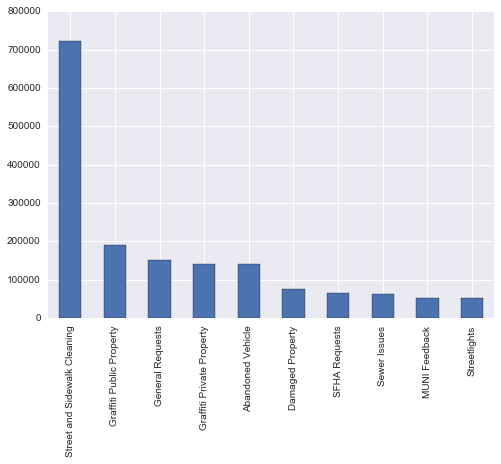

In [7]:
# Category Frequency (top 10)
sf_data.Category.value_counts(ascending=False)[0:10].plot(kind='bar')

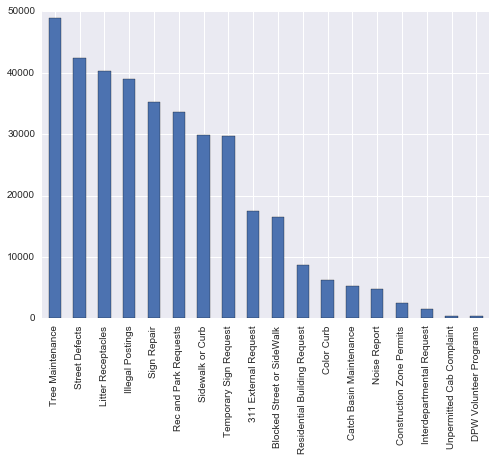

In [8]:
# Category Frequency (10 - 28)
sf_data.Category.value_counts(ascending=False)[10:].plot(kind='bar')

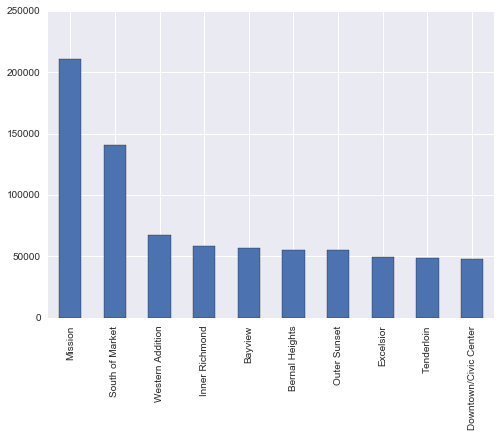

In [9]:
# number of requests per Neighborhood 
sf_data.Neighborhood.value_counts(ascending=False)[0:10].plot(kind='bar')

Closed    1925132
Open        96963
Name: Status, dtype: int64


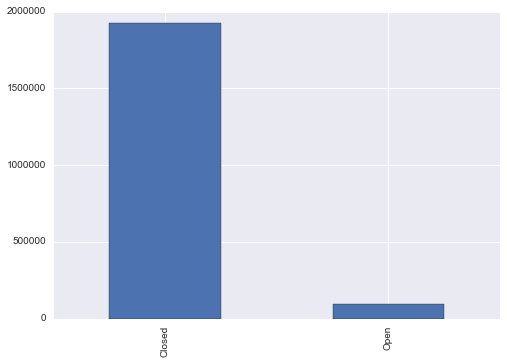

In [10]:
#Most cases, are close but quite a few open.

print sf_data.Status.value_counts(ascending=False)
sf_data.Status.value_counts(ascending=False).plot(kind='Bar')

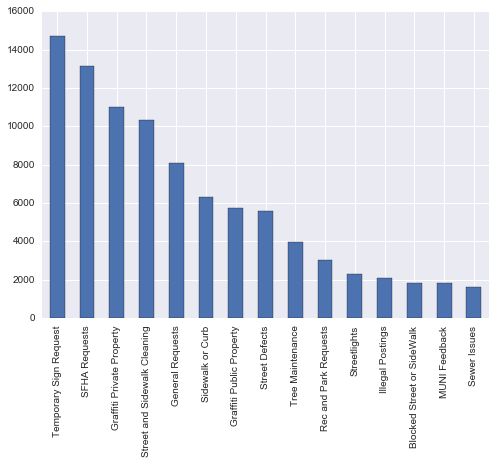

In [11]:
#Categories of open requests

open_req = sf_data.query('Status == ["Open"]')
open_req.Category.value_counts(ascending=False)[0:15].plot(kind='bar')

Voice In             1195231
Open311               431776
Web Self Service      283443
Integrated Agency      83098
Twitter                23434
Other Department        4073
e-mail In                998
Mail In                    4
Name: Source, dtype: int64


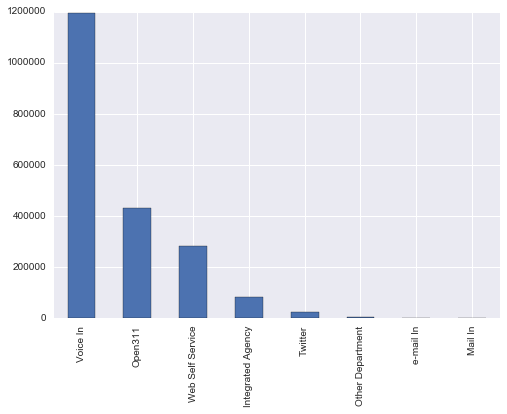

In [12]:
# Sources of 311 requests 
print sf_data.Source.value_counts(ascending=False) 

sf_data.Source.value_counts(ascending=False).plot(kind='bar')

In [13]:
# People still mail in this stuff?? 

sf_data.query('Source == ["Mail In"]')

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
697261,3596474,04/29/2014 11:06:38 AM,06/17/2015 11:01:53 AM,06/17/2015 11:01:53 AM,Closed,Case Resolved - CITATION DISMISSED PCO ERROR,SFMTA - Parking Enforcement - G,General Requests,mta - parking_enforcement - complaint,mta - parking_enforcement - complaint,Not associated with a specific address,0.0,NaN,NaN,Mail In,NaN
958946,2287428,04/25/2013 11:32:15 AM,04/25/2013 01:29:17 PM,04/25/2013 01:29:17 PM,Closed,Case Resolved - vehicle cited by pco 7J31,SFMTA - Parking Enforcement - G,General Requests,mta - parking_enforcement - request_for_service,mta - parking_enforcement - request_for_service,"755 OCEAN AVE, SAN FRANCISCO, CA, 94112",7.0,Oceanview,"(37.72281420212, -122.4489344645)",Mail In,NaN
1230541,6063056,07/08/2016 11:37:44 AM,07/08/2016 11:42:30 AM,07/08/2016 11:42:30 AM,Closed,"Case Resolved - PCO E67, 1 CITE",SFMTA - Parking Enforcement - G,General Requests,mta - parking_enforcement - complaint,mta - parking_enforcement - complaint,Not associated with a specific address,0.0,NaN,NaN,Mail In,NaN
1853324,5320420,11/25/2015 02:48:35 PM,11/25/2015 02:59:48 PM,11/25/2015 02:59:48 PM,Closed,Case Resolved - COMPLAINT WAS GIVEN TO OFFICER...,SFMTA - Parking Enforcement - G,General Requests,mta - parking_enforcement - request_for_service,mta - parking_enforcement - request_for_service,"401 LOS PALMOS DR, SAN FRANCISCO, CA, 94127",7.0,Miraloma Park,"(37.734368481798, -122.450754430929)",Mail In,NaN


### Time Series Analysis

In [14]:
sf_data.Opened.min()


'01/01/2009 01:00:05 PM'

In [15]:
sf_data.Closed.min()

inf

In [16]:
sf_data.Opened.max()

'12/31/2016 12:58:10 PM'

In [17]:
sf_data.Closed.max()

'12/31/2016 12:59:05 PM'

In [18]:
#Time related columns for now
sf_time = sf_data.iloc[:,:3]

sf_time.head(10)

,CaseID,Opened,Closed
0,322571,11/30/2008 11:53:00 PM,12/01/2008 03:19:00 PM
1,322568,11/30/2008 11:13:00 PM,07/21/2009 04:24:00 PM
2,322567,11/30/2008 11:07:00 PM,12/27/2008 06:07:00 AM
3,322566,11/30/2008 10:56:00 PM,07/21/2009 04:24:00 PM
4,322565,11/30/2008 10:46:00 PM,12/13/2008 10:50:00 AM
5,322564,11/30/2008 10:43:00 PM,12/01/2008 04:07:00 PM
6,322560,11/30/2008 10:24:00 PM,07/21/2009 04:24:00 PM
7,322559,11/30/2008 10:20:00 PM,12/01/2008 06:07:00 AM
8,322558,11/30/2008 10:04:00 PM,11/30/2008 10:18:00 PM
9,322556,11/30/2008 09:34:00 PM,12/09/2008 08:07:00 AM


In [25]:
startTime = sf_time.index[2]
sf_time['elapsed'] = sf_time.index[1] - startTime

In [27]:
sf_time.head()

,CaseID,Opened,Closed,elapsed
0,322571,11/30/2008 11:53:00 PM,12/01/2008 03:19:00 PM,-1
1,322568,11/30/2008 11:13:00 PM,07/21/2009 04:24:00 PM,-1
2,322567,11/30/2008 11:07:00 PM,12/27/2008 06:07:00 AM,-1
3,322566,11/30/2008 10:56:00 PM,07/21/2009 04:24:00 PM,-1
4,322565,11/30/2008 10:46:00 PM,12/13/2008 10:50:00 AM,-1


In [44]:
#?sf_time['elapsed'] = pd.DatetimeIndex(sf_time[3]).to_timedelta('D')

sf_time['elapsed'] = sf_time['elapsed'].astype('timedelta64[h]')



In [45]:
sf_time.head()

,CaseID,Opened,Closed,elapsed
0,322571,11/30/2008 11:53:00 PM,12/01/2008 03:19:00 PM,-1 days +23:00:00
1,322568,11/30/2008 11:13:00 PM,07/21/2009 04:24:00 PM,-1 days +23:00:00
2,322567,11/30/2008 11:07:00 PM,12/27/2008 06:07:00 AM,-1 days +23:00:00
3,322566,11/30/2008 10:56:00 PM,07/21/2009 04:24:00 PM,-1 days +23:00:00
4,322565,11/30/2008 10:46:00 PM,12/13/2008 10:50:00 AM,-1 days +23:00:00
